In [1]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img,  img_to_array, load_img

In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True

)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datageneartor = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_datageneartor,
    epochs=10,
    validation_data = validation_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 252ms/step - accuracy: 0.8238 - loss: 0.4211 - val_accuracy: 0.9012 - val_loss: 0.2289
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 244ms/step - accuracy: 0.8968 - loss: 0.2422 - val_accuracy: 0.9120 - val_loss: 0.2098
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 245ms/step - accuracy: 0.9020 - loss: 0.2263 - val_accuracy: 0.9052 - val_loss: 0.2207
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9088 - loss: 0.2072 - val_accuracy: 0.9180 - val_loss: 0.1953
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.9177 - loss: 0.1967 - val_accuracy: 0.9232 - val_loss: 0.1855
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9228 - loss: 0.1831 - val_accuracy: 0.9184 - val_loss: 0.1953
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9224 - loss: 0.1819 - val_accuracy: 0.9204 - val_loss: 0.1910
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 242ms/step - accuracy: 0.9295 -

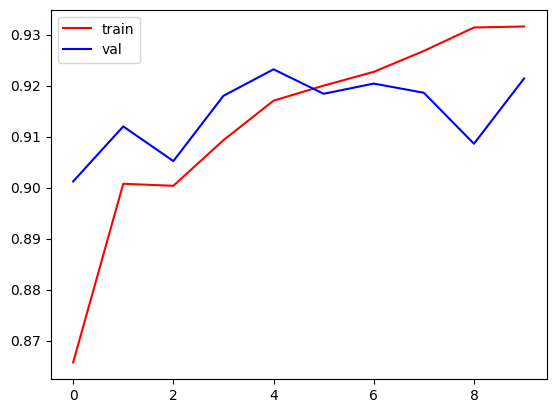

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label="train")
plt.plot(history.history['val_accuracy'],color='blue',label="val")
plt.legend()
plt.show()

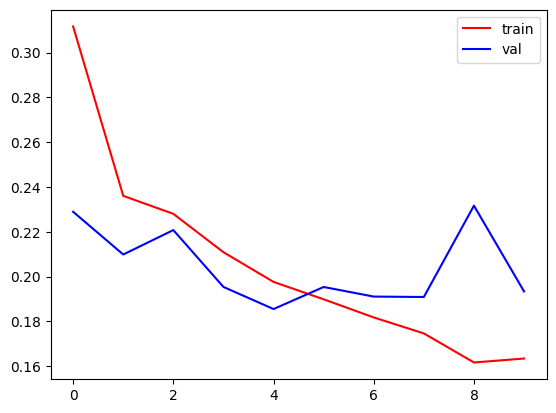

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label="train")
plt.plot(history.history['val_loss'],color='blue',label="val")
plt.legend()
plt.show()

In [14]:
import cv2

In [27]:
test_img = cv2.imread('/content/CAT.jpg')

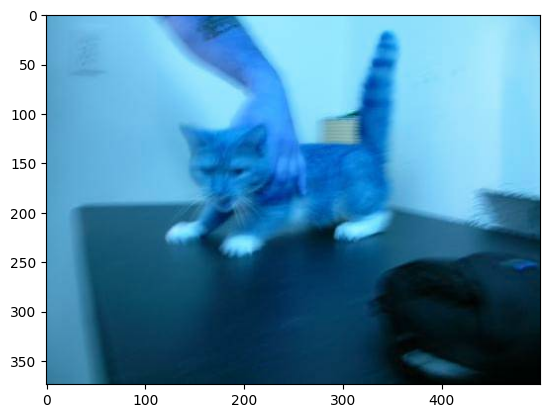

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(374, 500, 3)

In [30]:
test_img = cv2.resize(test_img,(150,150))

In [31]:
test_input = test_img.reshape((1,150,150,3))

In [32]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.99482274]], dtype=float32)